In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LONGSHORT.csv', sep = ";")

In [ ]:
df

,data,fixing_i_price_PLN,24h,48h,72h,96h,120h,144h,168h,Generation - Wind Onshore [MW] Day Ahead/ BZN|PL,Day-ahead Total Load Forecast [MW] - BZN|PL,Scheduled Generation [MW] (D) - BZN|PL
0,26.03.2018,154.69,148.60,159.37,162.06,146.54,158.72,149.90,141.31,769,16200,15086
1,26.03.2018,166.60,154.69,160.00,164.00,147.05,161.00,150.10,149.76,756,15800,14663
2,26.03.2018,190.06,154.70,162.19,174.80,160.00,167.60,162.26,151.18,717,15600,14469
3,26.03.2018,228.30,155.80,167.70,186.67,173.02,183.47,185.01,185.00,681,15850,14661
4,26.03.2018,272.37,163.23,174.90,291.01,200.37,230.00,235.00,226.20,655,16400,15074
...,...,...,...,...,...,...,...,...,...,...,...,...
7124,16.01.2019,177.54,178.63,164.21,100.00,161.00,191.21,212.89,210.00,2998,24035,21895
7125,16.01.2019,171.84,177.80,156.94,86.00,156.90,187.00,211.73,206.88,3102,23564,20981
7126,16.01.2019,167.00,176.28,147.69,75.84,156.00,178.46,203.84,203.00,3197,22406,20440
7127,16.01.2019,166.00,178.00,147.69,76.35,150.00,183.00,200.00,203.00,3286,20702,19254


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   data                                               7129 non-null   object 
 1   fixing_i_price_PLN                                 7129 non-null   float64
 2   24h                                                7129 non-null   float64
 3   48h                                                7129 non-null   float64
 4   72h                                                7129 non-null   float64
 5   96h                                                7129 non-null   float64
 6   120h                                               7129 non-null   float64
 7   144h                                               7129 non-null   float64
 8   168h                                               7129 non-null   float64
 9   Generati

In [ ]:
df['data'] = pd.to_datetime(df['data'], infer_datetime_format=True)

array([<Axes: xlabel='data'>, <Axes: xlabel='data'>,
       <Axes: xlabel='data'>, <Axes: xlabel='data'>], dtype=object)

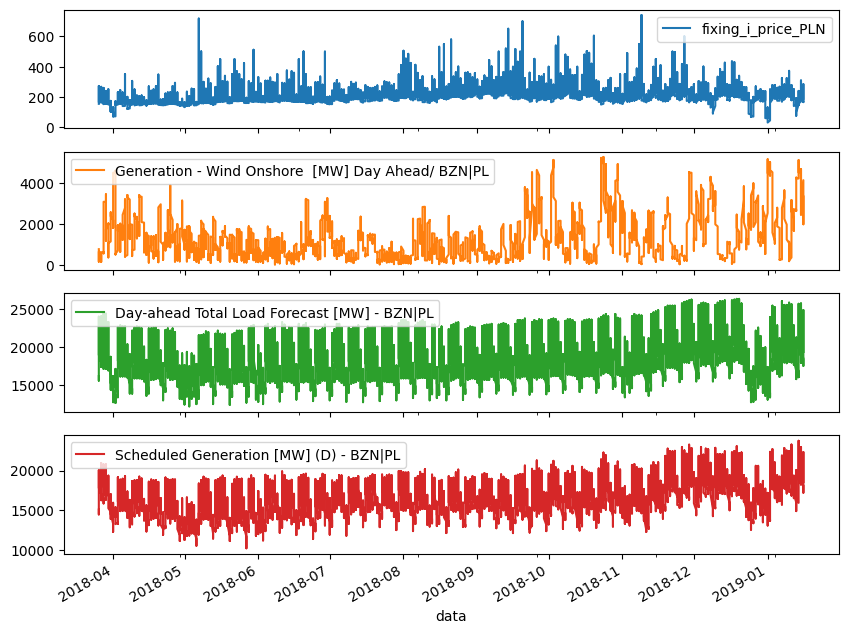

In [ ]:
df.set_index('data')[['fixing_i_price_PLN','Generation - Wind Onshore  [MW] Day Ahead/ BZN|PL', 'Day-ahead Total Load Forecast [MW] - BZN|PL', 'Scheduled Generation [MW] (D) - BZN|PL']].plot(subplots=True)

In [ ]:
df_input=df[['fixing_i_price_PLN','Generation - Wind Onshore  [MW] Day Ahead/ BZN|PL', 'Day-ahead Total Load Forecast [MW] - BZN|PL', 'Scheduled Generation [MW] (D) - BZN|PL']]

In [ ]:
df_input

,fixing_i_price_PLN,Generation - Wind Onshore [MW] Day Ahead/ BZN|PL,Day-ahead Total Load Forecast [MW] - BZN|PL,Scheduled Generation [MW] (D) - BZN|PL
0,154.69,769,16200,15086
1,166.60,756,15800,14663
2,190.06,717,15600,14469
3,228.30,681,15850,14661
4,272.37,655,16400,15074
...,...,...,...,...
7124,177.54,2998,24035,21895
7125,171.84,3102,23564,20981
7126,167.00,3197,22406,20440
7127,166.00,3286,20702,19254


In [ ]:
df_input.describe()

,fixing_i_price_PLN,Generation - Wind Onshore [MW] Day Ahead/ BZN|PL,Day-ahead Total Load Forecast [MW] - BZN|PL,Scheduled Generation [MW] (D) - BZN|PL
count,7129.000000,7129.000000,7129.000000,7129.000000
mean,234.640697,1304.350119,19469.736569,17046.168327
std,69.627458,1105.521971,3190.939816,2510.859166
min,31.000000,18.000000,12200.000000,10196.000000
25%,186.070000,452.000000,16700.000000,15070.000000
50%,220.670000,1000.000000,19700.000000,17258.000000
75%,269.140000,1798.000000,22000.000000,18822.000000
max,741.480000,5302.000000,26400.000000,23766.000000


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.17409357, 0.14212718, 0.28169014, 0.36035372],
       [0.19085689, 0.13966692, 0.25352113, 0.32918202],
       [0.22387682, 0.13228615, 0.23943662, 0.31488578],
       ...,
       [0.19141989, 0.60162755, 0.71873239, 0.75490052],
       [0.19001239, 0.61847086, 0.59873239, 0.66750184],
       [0.19423488, 0.63228615, 0.50626761, 0.61547531]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=7, sampling_rate=1, batch_size=1)[0]

(array([[[0.17409357, 0.14212718, 0.28169014, 0.36035372],
         [0.19085689, 0.13966692, 0.25352113, 0.32918202],
         [0.22387682, 0.13228615, 0.23943662, 0.31488578],
         [0.27769958, 0.12547313, 0.25704225, 0.32903464],
         [0.33972807, 0.12055261, 0.29577465, 0.35946942],
         [0.3400518 , 0.11203634, 0.41901408, 0.42866618],
         [0.30582142, 0.0987888 , 0.60211268, 0.56470155]]]),
 array([0.31527981]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
x_train.shape

(5703, 4)

In [ ]:
x_test.shape

(1426, 4)

In [ ]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.17409357, 0.14212718, 0.28169014, 0.36035372],
         [0.19085689, 0.13966692, 0.25352113, 0.32918202],
         [0.22387682, 0.13228615, 0.23943662, 0.31488578],
         ...,
         [0.17512104, 0.37149886, 0.63380282, 0.57870302],
         [0.17512104, 0.35579107, 0.52112676, 0.50633751],
         [0.17505067, 0.32626798, 0.41549296, 0.39955785]],
 
        [[0.19085689, 0.13966692, 0.25352113, 0.32918202],
         [0.22387682, 0.13228615, 0.23943662, 0.31488578],
         [0.27769958, 0.12547313, 0.25704225, 0.32903464],
         ...,
         [0.17512104, 0.35579107, 0.52112676, 0.50633751],
         [0.17505067, 0.32626798, 0.41549296, 0.39955785],
         [0.17512104, 0.27687358, 0.30985915, 0.28599853]],
 
        [[0.22387682, 0.13228615, 0.23943662, 0.31488578],
         [0.27769958, 0.12547313, 0.25704225, 0.32903464],
         [0.33972807, 0.12055261, 0.29577465, 0.35946942],
         ...,
         [0.17505067, 0.32626798, 0.41549296, 0.39955785],
        

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_6 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-119-3b00c92e395b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


156/156 [==============================] - 17s 72ms/step - loss: 0.0112 - mean_absolute_error: 0.0776 - val_loss: 0.0038 - val_mean_absolute_error: 0.0447
Epoch 2/50
156/156 [==============================] - 11s 71ms/step - loss: 0.0068 - mean_absolute_error: 0.0586 - val_loss: 0.0042 - val_mean_absolute_error: 0.0483
Epoch 3/50
156/156 [==============================] - 11s 72ms/step - loss: 0.0063 - mean_absolute_error: 0.0558 - val_loss: 0.0057 - val_mean_absolute_error: 0.0582


In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-124-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.005666401237249374, 0.05823115259408951]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-125-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

706

In [ ]:
predictions

array([[0.3920455 ],
       [0.35894954],
       [0.32497662],
       [0.29212704],
       [0.26413035],
       [0.24324667],
       [0.23121996],
       [0.22853398],
       [0.23508026],
       [0.25046855],
       [0.27333012],
       [0.30135065],
       [0.33243895],
       [0.3626014 ],
       [0.38898194],
       [0.408956  ],
       [0.42150003],
       [0.42824674],
       [0.43061298],
       [0.4293446 ],
       [0.4240048 ],
       [0.41414714],
       [0.39993477],
       [0.38129115],
       [0.3590092 ],
       [0.3341114 ],
       [0.30892622],
       [0.2850325 ],
       [0.26523614],
       [0.2510756 ],
       [0.24336635],
       [0.24230622],
       [0.24762899],
       [0.25890267],
       [0.2752769 ],
       [0.29514867],
       [0.31847364],
       [0.34356385],
       [0.3676846 ],
       [0.3885979 ],
       [0.404849  ],
       [0.41638744],
       [0.42392772],
       [0.4279226 ],
       [0.42749757],
       [0.42164457],
       [0.41046125],
       [0.393

In [ ]:
y_test

array([0.2839348 , 0.25194235, 0.23082986, ..., 0.19141989, 0.19001239,
       0.19423488])

In [ ]:
x_test

array([[0.2839348 , 0.27781983, 0.45774648, 0.45858511],
       [0.25194235, 0.3162377 , 0.5       , 0.4963154 ],
       [0.23082986, 0.34178653, 0.56338028, 0.57022845],
       ...,
       [0.19141989, 0.60162755, 0.71873239, 0.75490052],
       [0.19001239, 0.61847086, 0.59873239, 0.66750184],
       [0.19423488, 0.63228615, 0.50626761, 0.61547531]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.0336866 , 0.92253521, 0.84672071],
       [0.04144587, 0.96478873, 0.86293294],
       [0.0497729 , 0.99295775, 0.90471629],
       ...,
       [0.60162755, 0.71873239, 0.75490052],
       [0.61847086, 0.59873239, 0.66750184],
       [0.63228615, 0.50626761, 0.61547531]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1,2
0,0.392045,0.033687,0.922535,0.846721
1,0.358950,0.041446,0.964789,0.862933
2,0.324977,0.049773,0.992958,0.904716
3,0.292127,0.058289,0.985915,0.903316
4,0.264130,0.068509,0.950704,0.871850
...,...,...,...,...
701,0.259457,0.563967,0.833451,0.862122
702,0.249475,0.583649,0.800282,0.794768
703,0.245496,0.601628,0.718732,0.754901
704,0.247426,0.618471,0.598732,0.667502


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[  309.54048534,   196.        , 25300.        , 21686.        ],
       [  286.02647063,   237.        , 25900.        , 21906.        ],
       [  261.88939115,   281.        , 26300.        , 22473.        ],
       ...,
       [  205.42012855,  3197.        , 22406.        , 20440.        ],
       [  206.79105737,  3286.        , 20702.        , 19254.        ],
       [  211.91386263,  3359.        , 19389.        , 18548.        ]])

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

fixing_i_price_PLN                                   706
Generation - Wind Onshore  [MW] Day Ahead/ BZN|PL    706
Day-ahead Total Load Forecast [MW] - BZN|PL          706
Scheduled Generation [MW] (D) - BZN|PL               706
dtype: int64

In [ ]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-137-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [ ]:
df_final

,fixing_i_price_PLN,Generation - Wind Onshore [MW] Day Ahead/ BZN|PL,Day-ahead Total Load Forecast [MW] - BZN|PL,Scheduled Generation [MW] (D) - BZN|PL,App_Pred
6423,339.00,196,25300,21686,309.540485
6424,301.74,237,25900,21906,286.026471
6425,254.09,281,26300,22473,261.889391
6426,247.88,326,26200,22454,238.550422
6427,210.05,380,25700,22027,218.659334
...,...,...,...,...,...
7124,177.54,2998,24035,21895,215.338665
7125,171.84,3102,23564,20981,208.247042
7126,167.00,3197,22406,20440,205.420129
7127,166.00,3286,20702,19254,206.791057


<Axes: >

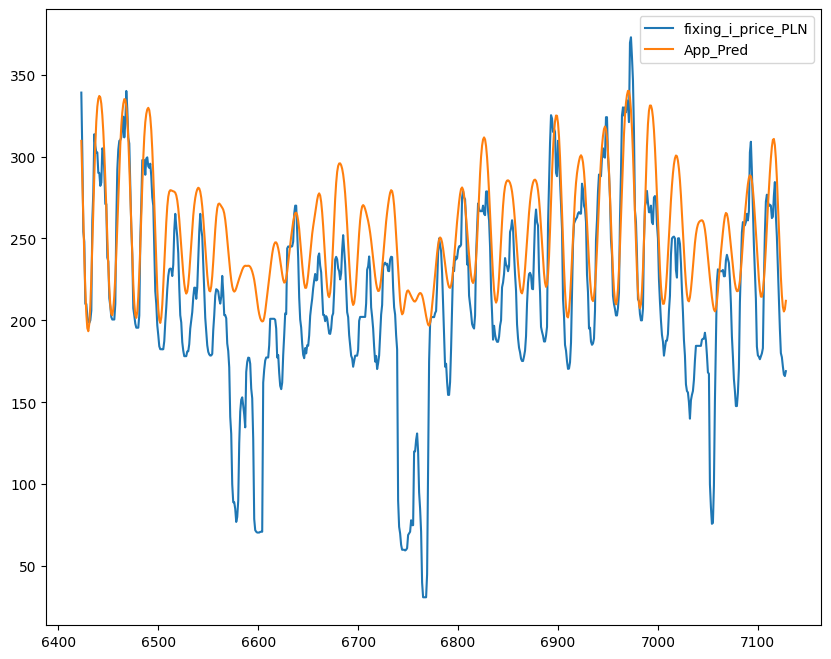

In [ ]:
df_final[['fixing_i_price_PLN','App_Pred']].plot()